In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import plotly.express as px

In [2]:
# product table 가져오기
base_path = os.getcwd()
product = pd.read_csv(base_path + '/product_final.csv', skiprows = [6043, 6568, 7398, 7938, 9025, 10263, 10426, 10904, 11372, 11944, 14111, 14531, 15075, 29905, 31624, 33019, 35747, 35961, 37769, 38104, 38274, 38403])
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44402 entries, 0 to 44401
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44402 non-null  int64 
 1   gender              44402 non-null  object
 2   masterCategory      44402 non-null  object
 3   subCategory         44402 non-null  object
 4   articleType         44402 non-null  object
 5   baseColour          44387 non-null  object
 6   season              44381 non-null  object
 7   usage               44085 non-null  object
 8   productDisplayName  44395 non-null  object
 9   brand               44395 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.4+ MB


In [3]:
# click_stream_new table
click_stream_new = pd.read_csv(base_path + '/click_stream_final.csv')
click_stream_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ GB


In [4]:
# customer table
customer = pd.read_csv(base_path + '/customer_final.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      99999 non-null  int64 
 1   gender           99999 non-null  object
 2   birthdate        99999 non-null  object
 3   home_location    99999 non-null  object
 4   first_join_date  99999 non-null  object
 5   age_join         99999 non-null  int64 
 6   age_now          99999 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [5]:
# transaction_new
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254578 entries, 0 to 1254577
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   created_at      1254578 non-null  object 
 1   customer_id     1254578 non-null  int64  
 2   booking_id      1254578 non-null  object 
 3   session_id      1254578 non-null  object 
 4   payment_method  1254578 non-null  object 
 5   payment_status  1254578 non-null  int64  
 6   promo_amount    1254578 non-null  int64  
 7   promo_code      1254578 non-null  float64
 8   shipment_fee    1254578 non-null  int64  
 9   total_amount    1254578 non-null  int64  
 10  product_id      1254578 non-null  int64  
 11  quantity        1254578 non-null  int64  
 12  item_price      1254578 non-null  int64  
 13  with_promo      1254578 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 134.0+ MB


In [6]:
# sales
sales = pd.read_csv(base_path + '/sales.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852582 entries, 0 to 852581
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  852582 non-null  int64 
 1   booking_id   852582 non-null  object
 2   sales        852582 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 19.5+ MB


In [7]:
# 재정의된 session
df_buy_split = pd.read_csv(base_path + '/df_buy_split.csv')
df_buy_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12463004 entries, 0 to 12463003
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
 11  customer_id      float64
 12  booking_id       object 
 13  quarter          float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.3+ GB


# 1. 브랜드 관련 EDA

In [8]:
product.brand.value_counts()

nike        2288
puma        2092
adidas      2079
united      1401
fabindia     750
            ... 
ayaanay        1
swayam         1
levi'si        1
megadeth       1
deniyo         1
Name: brand, Length: 443, dtype: int64

#### 2021년 인도네시아 18세 ~ 55세 설문조사 결과를 토대로 인기있는 상위 10개 브랜드가 이커머스에 입점되어 있는지 확인 

In [9]:
# 이커머스 회사의 고객 타겟층인 18세에서 35세와 다소 차이가 있을 수 있으나, 참고 목적으로 살펴볼 예정
    # 출처 : https://welcon.kocca.kr/cmm/fms/CrawlingFileDown.do?atchFileId=FILE_f016d5ef-6951-4e09-9cf0-8f513a360671&fileSn=1
brand = product.brand.dropna()
for famous_brand in ['adidas', 'h&m', 'converse', 'uniqlo', 'nike', 'eiger', '3second', 'nevada', 'vans', 'cardinal']:
    print(f'{famous_brand} :', len(brand[brand.str.contains(famous_brand)]))

adidas : 2079
h&m : 0
converse : 169
uniqlo : 0
nike : 2288
eiger : 0
3second : 0
nevada : 0
vans : 196
cardinal : 0


In [10]:
# 문제점 : 인도네시아에서 인기있는 브랜드인 adidas, nike를 제외하고 입점이 안되어있거나 제품 수가 매우 적음

# 2. 검색어 관련 EDA (추후 진행)

In [11]:
# 검색 키워드 유니크 값
click_stream_new.search_keywords.unique()

array([nan, 'Dress', "Woman's Bag", 'Trousers', 'Shirts', 'Shoes',
       'Work Bag', 'T-Shirt', 'Hat', 'Second Hand', 'Nike Shoes',
       'Adidas Shoes', 'Watch', 'Sandal', 'House dress', 'Pajamas'],
      dtype=object)

In [12]:
# 검색 키워드가 NaN 값이 아닌 데이터: 1173266
len(click_stream_new) - click_stream_new.search_keywords.isnull().sum()

1173266

In [13]:
# SEARCH라는 이벤트가 있을때만 검색 키워드 존재
click_stream_new.groupby(['search_keywords', 'event_name']).count()

,,session_id,event_time,traffic_source,product_id,quantity,item_price,payment_status,promo_code,promo_amount
search_keywords,event_name,,,,,,,,,
Adidas Shoes,SEARCH,25627,25627,25627,0,25627,25627,0,25627,25627
Dress,SEARCH,333023,333023,333023,0,333023,333023,0,333023,333023
Hat,SEARCH,4844,4844,4844,0,4844,4844,0,4844,4844
House dress,SEARCH,1197,1197,1197,0,1197,1197,0,1197,1197
Nike Shoes,SEARCH,51578,51578,51578,0,51578,51578,0,51578,51578
Pajamas,SEARCH,2268,2268,2268,0,2268,2268,0,2268,2268
Sandal,SEARCH,12787,12787,12787,0,12787,12787,0,12787,12787
Second Hand,SEARCH,224882,224882,224882,0,224882,224882,0,224882,224882
Shirts,SEARCH,167632,167632,167632,0,167632,167632,0,167632,167632


In [14]:
click_stream_new.columns

Index(['session_id', 'event_name', 'event_time', 'traffic_source',
       'product_id', 'quantity', 'item_price', 'payment_status',
       'search_keywords', 'promo_code', 'promo_amount'],
      dtype='object')

In [15]:
# 검색을 많이 한 순서대로 정렬
click_stream_new['search_keywords'].value_counts()

Dress           333023
Second Hand     224882
Shirts          167632
Woman's Bag     128790
T-Shirt         107184
Nike Shoes       51578
Trousers         39748
Work Bag         38677
Shoes            28029
Adidas Shoes     25627
Sandal           12787
Watch             7000
Hat               4844
Pajamas           2268
House dress       1197
Name: search_keywords, dtype: int64

In [16]:
# 번역한 데이터를 바탕으로 키워드 순위 재구성 

# -> 1. 드레스에 대한 수요가 많음
# -> 2. 중고상품에 대한 수요가 많음
# -> 3. Nike, Adidas 신발 수요 많음
# -> 4. Time에 대한 검색 수요가 있음(..?)

In [17]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,MOBILE,15315.0,4,313529,NaN,NaN,0.0,0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,MOBILE,NaN,0,0,1.0,NaN,0.0,0


키워드 중 중고 검색 비율

In [18]:
# 2016~2022년까지 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율
click_stream_new['event_time'] = pd.to_datetime(click_stream_new['event_time'])
click_stream_new['month'] = click_stream_new['event_time'].dt.to_period('M')
click_stream_new['month'] = click_stream_new['month'].astype('str')

# 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율 정보 데이터프레임
temp_click_stream_new = click_stream_new[click_stream_new['search_keywords'].notnull()].groupby('month')['session_id'].count()
temp_click_stream_new = pd.DataFrame(data=temp_click_stream_new).reset_index()

temp_secondhand = click_stream_new[click_stream_new['search_keywords'] == 'Second Hand'].groupby('month')['session_id'].count()
temp_secondhand = pd.DataFrame(data=temp_secondhand).reset_index()

temp_click_stream_new = pd.merge(temp_click_stream_new, temp_secondhand, how='inner', on='month')
temp_click_stream_new.columns = ['month', 'total_count', 'second_hand_count']

temp_click_stream_new['ratio_second_hand'] = round((temp_click_stream_new['second_hand_count'] / temp_click_stream_new['total_count']) * 100, 2)
temp_click_stream_new.head()

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_17179/846743445.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  click_stream_new['month'] = click_stream_new['event_time'].dt.to_period('M')


,month,total_count,second_hand_count,ratio_second_hand
0,2016-07,341,60,17.60
1,2016-08,700,116,16.57
2,2016-09,985,191,19.39
3,2016-10,1269,258,20.33
4,2016-11,1562,300,19.21


In [81]:
# 월별로 중고 검색 횟수 모아보기
fig = px.line(temp_click_stream_new, x='month', y='second_hand_count', markers=True,
              width = 1000, height = 500)
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Count of Searching Second-Hand per Month', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
fig.show()

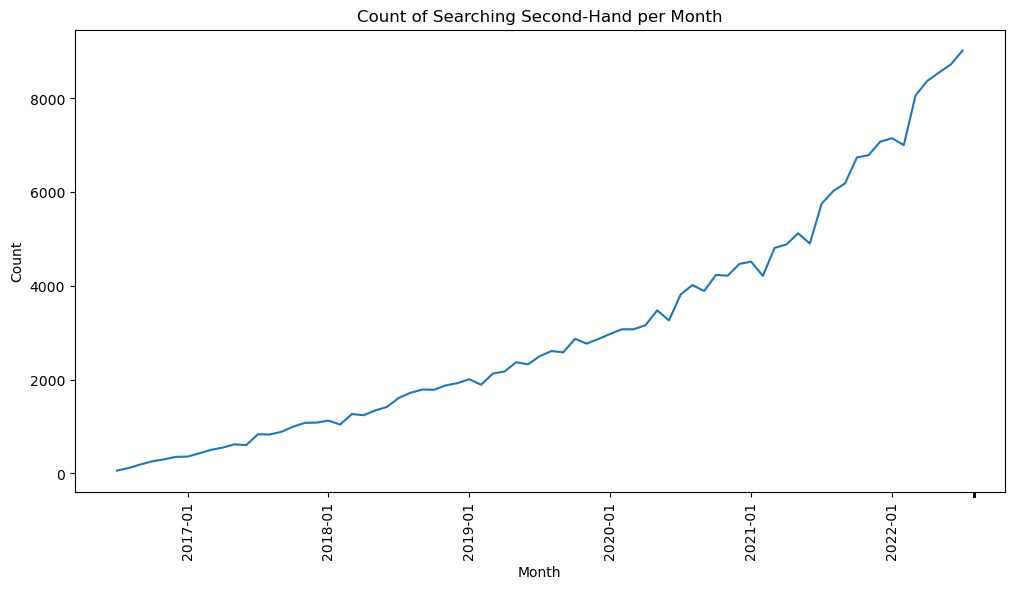

In [20]:
# 월별로 중고 검색 횟수 모아보기
plt.figure(figsize=(12, 6))
ax = sns.lineplot(temp_click_stream_new, x='month', y='second_hand_count')
# ax2 = ax.twinx()
# ax2 = sns.barplot(temp_click_stream_new, x='month', y='ratio_second_hand', ax=ax2)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Searching Second-Hand per Month')
label =['2017-01', '2018-01', '2019-01', '2020-01', '2021-01', '2022-01']
x_ticks = [month if month in label else '' for month in temp_click_stream_new.month]
plt.xticks(x_ticks, rotation=90)
plt.show()

중고 검색한 회원 수 비율

In [21]:
# 연도별 신규 가입 고객 수 계산
# 가입년도, 월 Column 생성
customer.first_join_date = pd.to_datetime(customer.first_join_date)
customer['join_year'] = customer.first_join_date.dt.year
customer['join_year_month'] = customer.first_join_date.dt.to_period('M')
customer

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,join_year,join_year_month
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,2019,2019-07
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,2017,2017-07
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020,2020-08
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,2021,2021-10
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021,2021-04
...,...,...,...,...,...,...,...,...,...
99994,34743,M,2000-11-17,Lampung,2020-10-17,20,22,2020,2020-10
99995,72065,M,1998-03-30,Aceh,2017-11-25,19,24,2017,2017-11
99996,32818,F,1993-01-12,Maluku,2018-09-01,25,29,2018,2018-09
99997,75597,M,2000-09-13,Jambi,2020-05-31,20,22,2020,2020-05


In [22]:
# 검색어에 대한 데이터를 얻기 위해 df_buy_split과 병합
join_year_search = pd.merge(df_buy_split, customer[['customer_id', 'join_year', 'join_year_month']], how='left', on='customer_id')

In [23]:
# 중고를 검색한 년도, 월 column 생성
join_year_search.event_time = pd.to_datetime(join_year_search.event_time)
join_year_search['year'] = join_year_search.event_time.dt.year
join_year_search['year_month'] = join_year_search.event_time.dt.to_period('M')
join_year_search.head()

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_17179/2082637043.py:4: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter,join_year,join_year_month,year,year_month
0,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,2016,2016-10,2016,2016-10
1,44122af0-0bf5-407b-b3ff-22c082c61426_0,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.0,1,255356,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,2016,2016-10,2016,2016-10
2,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,2016,2016-10,2016,2016-10
3,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,2016,2016-10,2016,2016-10
4,44122af0-0bf5-407b-b3ff-22c082c61426_0,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,2016,2016-10,2016,2016-10


In [24]:
# 2016-08월부터 2022-07월까지 1년 단위
# 년도별 가입회원(누적) 대비 중고를 검색한 회원 수
ans_dict = {'year':[], 'search_sh_ratio':[]}
for year in range(2016, 2022):
    second_hand_search = join_year_search[(join_year_search.search_keywords == 'Second Hand') & (join_year_search.year_month >= f'{year}-08') & (join_year_search.year_month <= f'{year + 1}-07')].customer_id.nunique()
    num_customer_cumsum = join_year_search.groupby('join_year_month').customer_id.nunique().cumsum().loc[f'{year+1}-07']
    ans_dict['year'].append(f'{year}-08 ~ {year+1}-07')
    ans_dict['search_sh_ratio'].append(second_hand_search/num_customer_cumsum)

ans_dict

{'year': ['2016-08 ~ 2017-07',
  '2017-08 ~ 2018-07',
  '2018-08 ~ 2019-07',
  '2019-08 ~ 2020-07',
  '2020-08 ~ 2021-07',
  '2021-08 ~ 2022-07'],
 'search_sh_ratio': [0.2947802633666508,
  0.32559515008132484,
  0.336030305864746,
  0.34810443132939883,
  0.36202437204675453,
  0.382632533922373]}

In [90]:
sh_search_custo_ratio = pd.DataFrame(ans_dict)
sh_search_custo_ratio.search_sh_ratio = round(sh_search_custo_ratio.search_sh_ratio, 2)

fig = px.bar(sh_search_custo_ratio, x='year', y='search_sh_ratio',
             labels={'year':'period', 'search_sh_ratio':'ratio'},
             width = 1000, height = 500)
title = {'text':'Searching Second_Hand Ratio of Customer', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
fig.show()

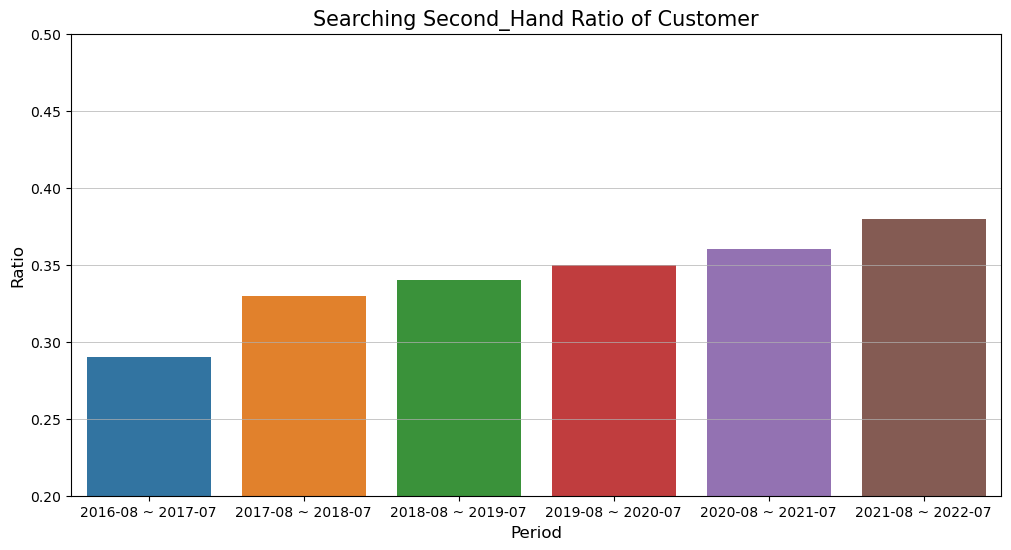

In [25]:
# 년도별 가입회원(누적) 대비 중고를 검색한 회원 수
sh_search_custo_ratio = pd.DataFrame(ans_dict)
sh_search_custo_ratio.search_sh_ratio = round(sh_search_custo_ratio.search_sh_ratio, 2)

plt.figure(figsize=(12, 6))
sns.barplot(data = sh_search_custo_ratio, x='year', y='search_sh_ratio')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.title('Searching Second_Hand Ratio of Customer', fontsize=15)
plt.ylim(0.2, 0.5)
plt.grid(axis='y', linewidth=0.5)
plt.show()

##### 구매로 이어진(구매시도까지 이어진) 검색어 탐색

In [26]:
click_stream_new = click_stream_new.sort_values(by='event_time')

In [27]:
click_stream_new.payment_status.unique()

array([nan,  1.,  0.])

In [28]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
12371556,607d864b-76b5-45a1-a45d-7fb666a03ea1,HOMEPAGE,2016-06-30 22:59:36.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371559,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:01:06.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371557,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2016-06-30 23:01:14.254358+00:00,MOBILE,33314.0,3,210265,NaN,NaN,0.0,0,2016-06
12371560,607d864b-76b5-45a1-a45d-7fb666a03ea1,CLICK,2016-06-30 23:02:35.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371561,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:03:56.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06


In [29]:
# 추후 session 정보가 생기면 더 자세하게 진행
print(f'session_id 유니크값: {click_stream_new.session_id.nunique()}')

print(f"session_id 값들 중 검색을 한 session_id 수: {click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()}")

print(f"session_id 중 검색이 포함된 session_id 비율: {round(click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()/click_stream_new.session_id.nunique() * 100, 2)}%")
num_search = len(click_stream_new[click_stream_new['event_name'] == 'SEARCH'])

print(f'검색 횟수: {num_search}')

session_id 유니크값: 895203
session_id 값들 중 검색을 한 session_id 수: 490846
session_id 중 검색이 포함된 session_id 비율: 54.83%
검색 횟수: 1173266


In [30]:
# T-Shirt -> Tshirts(articleType)
# Shoes, Adidas Shoes, Nike Shoes -> Shoes
# Woman's Bag, Work Bag -> Bags
# Dress -> Dress
# Sandal -> Sandas
# Shirts -> shirts
# Trousers -> trousers(articleType)
# Pajamas, House Dress -> Loungewear and Nightwear
# Hat -> Hat(articleType)

In [31]:
# click_trans_df = pd.merge(click_stream_new, transaction_df[['session_id', 'event_time', 'product_id']], how='left', on=['session_id', 'event_time'])
# x = click_trans_df.product_id_x
# y = click_trans_df.product_id_y
# z = x.fillna(0)+y.fillna(0)
# z = z.replace(0, np.nan)

# click_trans_df.product_id_x = z
# click_trans_df.rename(columns={'product_id_x':'product_id'}, inplace=True)
# click_trans_df.drop('product_id_y', axis=1, inplace=True)
# click_trans_df.head()

In [32]:
# cnt = 0

# temp = click_stream_new[click_stream_new.session_id == '98e66f53-f24f-4238-8c9c-34a0482e22d5'].reset_index(drop=True)
# search_idx = temp[temp['event_name'] == 'SEARCH'].index
# # search_dict = {idx:temp.loc[idx]['search_keywords'] for idx in search_idx}
# trans_idx = temp[(temp['event_name'] == 'ADD_TO_CART') | (temp['event_name'] == 'BOOKING')].index

# for i in search_idx:
#     filtered_idx = trans_idx[trans_idx > i]
#     filtered_ = [temp.iloc[i] for i in filtered_idx]
#     if temp.iloc[i] in filtered_:
#         cnt += 1


# 3. 회원가입 후 첫 구매까지의 기간 분석

### 결론 
1. 회원가입 후 구매까지 이어지는 비율 50.7% -> 회원가입을 했다는 것을 구매하고 싶은 상품이 있었다는 이야기지만 구매로 이어지지 않았다는게 문제(이유..?)
2. 회원가입한 사람 중 하루 이내에 구매한 사람 비율 : 39.1% -> 일반적으로 60%가 구매함(나래님 자료), 첫 구매 유도를 잘 하지 못한것이 문제

In [33]:
50.6*77.1

3901.2599999999998

In [34]:
customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,join_year,join_year_month
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,2019,2019-07
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,2017,2017-07
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020,2020-08
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,2021,2021-10
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021,2021-04


In [35]:
transaction_new = transaction_new.sort_values(by='created_at')
transaction_new.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
1254454,2016-06-30 23:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,1,0,0.0,10000,640795,33314,3,210265,0
1201589,2016-07-01 02:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,1,6053,4.0,10000,578826,16061,1,163539,1
1201590,2016-07-01 02:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,1,6053,4.0,10000,578826,7588,1,411340,1
1201721,2016-07-01 09:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,1,0,0.0,15000,333792,47650,1,318792,0
1254453,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,1,0,0.0,10000,256670,32185,1,246670,0


In [36]:
# customer_id 별 최초 거래 일시 추출
first_transaction = transaction_new.groupby('customer_id')['created_at'].min()
first_transaction

customer_id
3        2018-08-25 18:54:03.844494+00:00
8        2021-02-13 09:47:39.656991+00:00
9        2021-06-27 01:51:48.421034+00:00
11       2022-03-07 14:29:13.759159+00:00
15       2019-09-30 04:47:36.105040+00:00
                       ...               
99992    2020-06-30 21:03:37.873510+00:00
99995    2020-08-19 09:50:48.810263+00:00
99997    2020-04-25 18:38:16.825127+00:00
99998    2018-07-02 20:56:19.703960+00:00
99999    2016-10-12 19:22:21.166237+00:00
Name: created_at, Length: 50704, dtype: object

In [37]:
# customer_id 별 최초 거래 일시 정보를 customer 테이블과 병합
merge_customer = pd.merge(customer, first_transaction, how='left', on='customer_id')
merge_customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,join_year,join_year_month,created_at
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,2019,2019-07,NaN
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,2017,2017-07,NaN
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020,2020-08,2020-08-23 12:53:12.916342+00:00
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,2021,2021-10,NaN
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021,2021-04,2021-04-16 09:20:03.134253+00:00


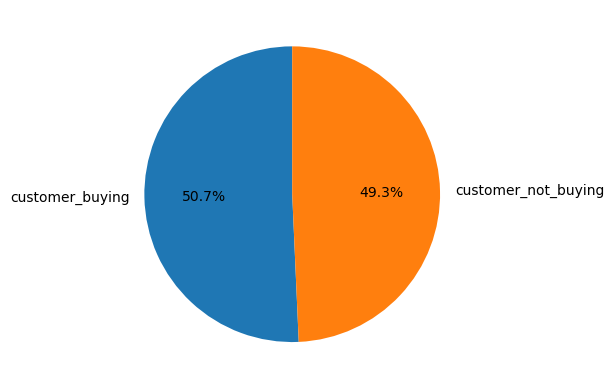

In [38]:
# 회원가입한 고객 중 구매경험이 있는 고객 비율
join_customer_buy_ratio = len(merge_customer[merge_customer.created_at.notnull()])/len(merge_customer)
labels = ['customer_buying', 'customer_not_buying']
plt.pie([join_customer_buy_ratio, 1-join_customer_buy_ratio], startangle=90, labels=labels, autopct='%.1f%%')
plt.show()

In [39]:
# 회원가입 후 실제 구매한 고객들의 성별 비율
merge_customer[merge_customer.created_at.notnull()].gender.value_counts(normalize=True)

F    0.641902
M    0.358098
Name: gender, dtype: float64

In [40]:
# 첫 구매일자 정보 데이터 타입 변환
merge_customer.created_at = pd.to_datetime(merge_customer.created_at).dt.date
merge_customer.created_at = pd.to_datetime(merge_customer.created_at)
merge_customer.first_join_date = pd.to_datetime(merge_customer.first_join_date)
merge_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      99999 non-null  int64         
 1   gender           99999 non-null  object        
 2   birthdate        99999 non-null  object        
 3   home_location    99999 non-null  object        
 4   first_join_date  99999 non-null  datetime64[ns]
 5   age_join         99999 non-null  int64         
 6   age_now          99999 non-null  int64         
 7   join_year        99999 non-null  int64         
 8   join_year_month  99999 non-null  period[M]     
 9   created_at       50704 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3), period[M](1)
memory usage: 8.4+ MB


In [41]:
merge_customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,join_year,join_year_month,created_at
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,2019,2019-07,NaT
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,2017,2017-07,NaT
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020,2020-08,2020-08-23
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,2021,2021-10,NaT
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021,2021-04,2021-04-16


In [42]:
# 회원가입자 중 당일 구입한 비율: 23.4%
period_buy_after_join = (merge_customer.created_at - merge_customer.first_join_date)
print(len(period_buy_after_join[period_buy_after_join == '0 days']) / period_buy_after_join.notnull().sum() * 0.507)


0.23434151151782895


In [43]:
# 구매자(50.7%) 중 구매까지 이어지는 기간 통계 정보
period_buy_after_join[period_buy_after_join.notnull()].describe()

count                        50704
mean     1 days 00:43:56.099715998
std      1 days 11:17:17.954955019
min                0 days 00:00:00
25%                0 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max               15 days 00:00:00
dtype: object

In [44]:
# 구매자(50.7%) 중 1일 이내에 구매하는 소비자 비율: 39.1%
print(len(period_buy_after_join[(period_buy_after_join == '0 days') | (period_buy_after_join == '1 days')]) / period_buy_after_join.notnull().sum() * 0.507)

0.3910991440517514


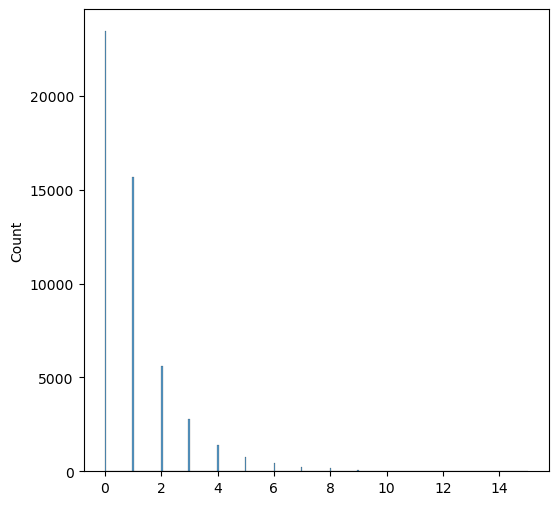

In [45]:
plt.figure(figsize=(6,6))
sns.histplot(period_buy_after_join[period_buy_after_join.notnull()].dt.days)
plt.show()

# 4. 재구매율, 전체 구매 데이터 기준으로, 재구매자가 며칠 이내 재구매인지 확인

#### 결론
    1. 재구매기간: 평균 43일

    2. 구매 횟수 기준 그룹 분할 (4분위수 활용)
        - 한번만 구매, 2~6회 구매, 7~18회 구매, 19~550회 구매
        - 그룹간 성별 비율, 연령 평균, 프로모션 이용 평균, 한번 구매시 평균 지출 비교

    3. 구매 횟수 기준 그룹 분석
        - 유의미한 정보는 없었으나 프로모션 이용률이 많이 구매한 4그룹이 가장 높음
        - 미구매자는 남녀비율이 5:5, 근데 구매자는 3.5:6.5(여성비율이 높음) -> ?????
        
    4. 재구매자 행동 분석(세션 나눠진 뒤 진행)

##### 재구매 고객 대상 재구매기간 분석

In [46]:
transaction_new.created_at = pd.to_datetime(transaction_new.created_at)

In [47]:
# 통합 데이터프레임 (booking_id별 정보)
merge_cust_trans = pd.merge(customer, transaction_new, how='inner', on='customer_id')
merge_cust_trans = merge_cust_trans[['customer_id', 'gender', 'birthdate', 'home_location', 'first_join_date'
                                        , 'age_join', 'age_now', 'created_at', 'booking_id', 'session_id'
                                        , 'with_promo']]
merge_cust_trans.drop_duplicates(inplace=True)
merge_data = pd.merge(merge_cust_trans, sales[['booking_id', 'sales']], how='left', on='booking_id')
merge_data = pd.merge(merge_data, click_stream_new[click_stream_new.event_name == 'BOOKING'][['session_id', 'event_time']], how='left', on='session_id')
merge_data.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,created_at,booking_id,session_id,with_promo,sales,event_time
0,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-08-23 12:53:12.916342+00:00,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,1,829751,2020-08-23 12:53:12.916342+00:00
1,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-08-31 13:34:59.916342+00:00,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,0,381341,2020-08-31 13:34:59.916342+00:00
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-09-08 13:38:30.916342+00:00,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,0,154220,2020-09-08 13:38:30.916342+00:00
3,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-09-16 13:48:09.916342+00:00,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,0,402502,2020-09-16 13:48:09.916342+00:00
4,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-09-24 13:32:03.916342+00:00,1a9d2de2-8c8c-43f3-8ccb-9fbba08ea6e1,a083d201-314b-4b5d-9b12-0f2b6010846d,0,396435,2020-09-24 13:32:03.916342+00:00


In [48]:
# 재구매 행위 기간 통계 자료

# customer_id, created_at 기준 정렬
merge_data = merge_data.sort_values(by=['customer_id', 'event_time'])

# 구매 행위 간 시간 차이 열 생성
merge_data['difference'] = merge_data.groupby(['customer_id'])['event_time'].diff()

merge_data.difference.describe()

count                        801878
mean     43 days 01:23:47.904752345
std      72 days 22:04:23.032538570
min                 0 days 00:00:18
25%                11 days 00:30:35
50%                21 days 00:13:35
75%         43 days 23:53:45.750000
max              1109 days 23:27:29
Name: difference, dtype: object

In [49]:
# 재구매 행위 기간 통계 자료

# customer_id, created_at 기준 정렬
merge_data = merge_data.sort_values(by=['customer_id', 'event_time'])

# 구매 행위 간 시간 차이 열 생성
merge_data['difference'] = merge_data.groupby(['customer_id'])['event_time'].diff()

merge_data.difference.describe()

count                        801878
mean     43 days 01:23:47.904752345
std      72 days 22:04:23.032538570
min                 0 days 00:00:18
25%                11 days 00:30:35
50%                21 days 00:13:35
75%         43 days 23:53:45.750000
max              1109 days 23:27:29
Name: difference, dtype: object

##### 구매 횟수 기준 그룹 분할

In [50]:
# 노트(무시하셔도 됩니다..)
# groupby, count를 할 경우에는 중복 유무를 떠나 모든 개수를 센다.
# 중복 여부를 고려하려면 groupby, nunique()를 쓰면 된다.

In [51]:
merge_data.groupby(['customer_id'])['booking_id'].nunique()

customer_id
3        51
8         7
9         6
11        1
15        5
         ..
99992    12
99995    60
99997     1
99998     8
99999     1
Name: booking_id, Length: 50704, dtype: int64

In [52]:
# 구매 횟수 통계 자료
purchase_cnt = merge_data.groupby(['customer_id'])['booking_id'].nunique()
purchase_cnt.describe()

count    50704.000000
mean        16.814886
std         29.711265
min          1.000000
25%          2.000000
50%          6.000000
75%         18.000000
max        550.000000
Name: booking_id, dtype: float64

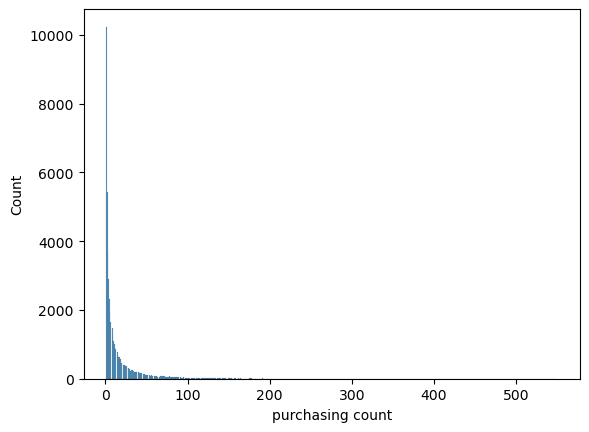

In [53]:
sns.histplot(purchase_cnt)
plt.xlabel('purchasing count')
plt.show()

In [54]:
# 그룹 분할
# 1번 그룹 : 1번만 구매한 고객 (20.2%)
# 2번 그룹 : 2 ~ 6 (32.2%)
# 3번 그룹 : 7 ~ 18 (23.0%)
# 4번 그룹 : 19 ~ 550 (24.6%)

# 비율 계산에 사용한 코드
ratio = 0
for i in range(19, 551):
    try:
        ratio += purchase_cnt.value_counts(normalize=True)[i]
    except KeyError:
        continue
ratio

0.2462133165036282

In [55]:
merge_data.groupby('customer_id')['difference'].mean()

customer_id
3           28 days 00:24:57.380000
8        76 days 02:09:47.166666667
9           67 days 01:22:32.800000
11                              NaT
15         207 days 00:20:05.500000
                    ...            
99992    63 days 01:08:06.545454545
99995    12 days 00:18:21.847457627
99997                           NaT
99998   186 days 00:33:58.571428572
99999                           NaT
Name: difference, Length: 50704, dtype: timedelta64[ns]

In [56]:
# 구매횟수별 평균 정보
purchase_info_dict = {'num':[], 'gender_F':[], 'age_now':[], 'with_promo':[], 'sales_mean':[], 'repurchase_period':[]}

for i in range(1, 551):
    try:
        customer_purchase_num_i = purchase_cnt[purchase_cnt == i].index
        group_purchase_num_i = merge_data[merge_data['customer_id'].isin(customer_purchase_num_i)].groupby('customer_id')
        if len(group_purchase_num_i) == 0:
            continue
        
        # 구매횟수 
        purchase_info_dict['num'].append(i)
        # 성비(여성 비율)
        if merge_data[merge_data['customer_id'].isin(customer_purchase_num_i)].gender.str.contains('F').any():
            purchase_info_dict['gender_F'].append(group_purchase_num_i.gender.unique().apply(lambda x: x[0]).value_counts(normalize=True)['F'])
        else:
            purchase_info_dict['gender_F'].append(0)
        # 평균 나이
        purchase_info_dict['age_now'].append(group_purchase_num_i.age_now.unique().apply(lambda x: x[0]).mean())
        # 프로모션을 이용한 구매 비율
        purchase_info_dict['with_promo'].append(group_purchase_num_i.with_promo.value_counts(normalize=True).loc[:, 1].sum() / len(group_purchase_num_i))
        # 구매 건당 평균 지출액
        purchase_info_dict['sales_mean'].append(group_purchase_num_i.sales.mean().mean())
        # 평균 재구매기간
        purchase_info_dict['repurchase_period'].append(group_purchase_num_i.difference.mean().mean())
    except:
        continue
purchase_info_dict

{'num': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  

In [57]:
# purchase_info_dict -> dataframe으로 변환
purchase_info = pd.DataFrame(purchase_info_dict)
purchase_info.index = purchase_info.num
purchase_info.drop('num', axis = 1, inplace=True)
purchase_info.head()

,gender_F,age_now,with_promo,sales_mean,repurchase_period
num,,,,,
1,0.638317,26.497022,0.354653,530898.727663,NaT
2,0.647373,26.593364,0.349862,541635.252903,439 days 04:13:04.873732712
3,0.643336,26.702333,0.355323,535346.317958,296 days 02:48:52.086618392
4,0.644168,26.570093,0.354448,542937.562651,226 days 10:58:37.755970924
5,0.641234,26.501500,0.351565,543253.239177,176 days 02:23:27.515859408


In [58]:
# 1번 그룹(한번만 구매한 고객)
purchase_g1 = purchase_info.loc[1, :]
purchase_g1

gender_F                  0.638317
age_now                  26.497022
with_promo                0.354653
sales_mean           530898.727663
repurchase_period              NaT
Name: 1, dtype: object

In [59]:
# 2번 그룹(2~6번 구매한 고객)
purchase_g2 = purchase_info.loc[2:6, :]
purchase_g2.mean()

gender_F                                0.643524
age_now                                26.544646
with_promo                              0.352714
sales_mean                         540278.208738
repurchase_period    257 days 20:03:56.633687688
dtype: object

In [60]:
# 3번 그룹(7~18번 구매한 고객)
purchase_g3 = purchase_info.loc[7:18, :]
purchase_g3.mean()

gender_F                               0.640643
age_now                                26.60947
with_promo                             0.355014
sales_mean                        541082.013167
repurchase_period    84 days 01:15:46.382424209
dtype: object

In [61]:
# 4번 그룹(19~550번 구매한 고객)
purchase_g4 = purchase_info.loc[19:, :]
purchase_g4.mean()

gender_F                                0.63647
age_now                               25.958594
with_promo                             0.416138
sales_mean                        540289.142928
repurchase_period    13 days 01:32:08.199123690
dtype: object

In [62]:
# 그룹별 평균 정보 통합 Dataframe
groups = [purchase_g1, purchase_g2, purchase_g3, purchase_g4]
groups_info_dict = {'gender_F':[], 'age_now':[], 'with_promo':[], 'sales_mean':[]}

for group in groups:
    for key in groups_info_dict.keys():
        groups_info_dict[key].append(group[key].mean())

groups_info = pd.DataFrame(groups_info_dict)
groups_info['group'] = np.array([f'group_{i}' for i in range(1, 5)])
groups_info

,gender_F,age_now,with_promo,sales_mean,group
0,0.638317,26.497022,0.354653,530898.727663,group_1
1,0.643524,26.544646,0.352714,540278.208738,group_2
2,0.640643,26.609470,0.355014,541082.013167,group_3
3,0.636470,25.958594,0.416138,540289.142928,group_4


(0.2, 0.5)

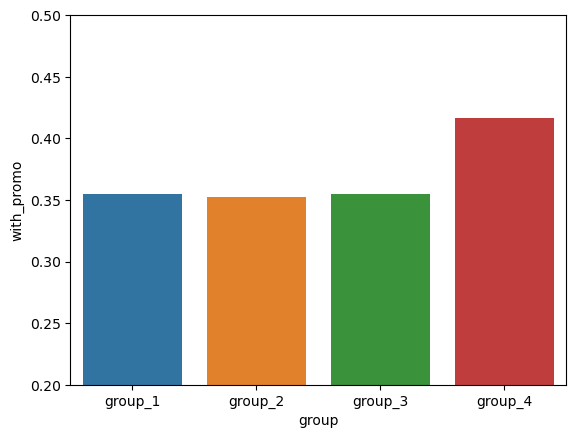

In [63]:
# 분석 결과가 거의 의미가 없음, 구매횟수가 제일 많은 그룹에서 프로모션 이용률만 약간 증가
sns.barplot(groups_info, x='group', y='with_promo')
plt.ylim(0.2, 0.5)

In [64]:
# click_stream_new.head()
#     - session_id, event_name, event_time, product_id, search_keywords, promo_code
# transaction_new
# - customer_id, session_id, booking_id, promo_code, 

In [65]:
customer.first_join_date

0       2019-07-21
1       2017-07-16
2       2020-08-23
3       2021-10-03
4       2021-04-11
           ...    
99994   2020-10-17
99995   2017-11-25
99996   2018-09-01
99997   2020-05-31
99998   2021-07-17
Name: first_join_date, Length: 99999, dtype: datetime64[ns]